In [2]:
import matplotlib.pyplot as plt
import numpy as np

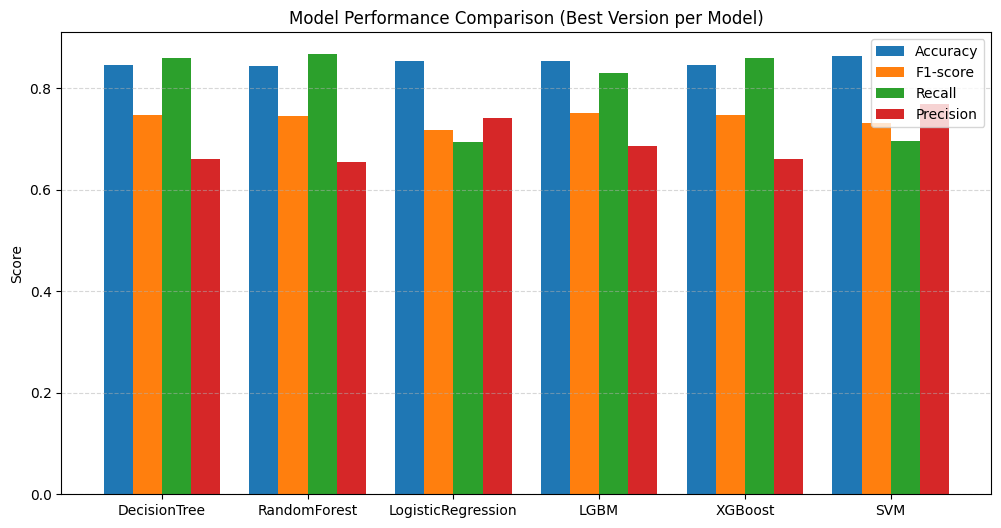

In [6]:

# 모델 이름
models = ["DecisionTree", "RandomForest", "LogisticRegression", "LGBM", "XGBoost", "SVM"]

# 성능 지표
accuracy = [0.845542305508234, 0.8438387279954571, 0.85451,0.8540601930721181, 0.845542305508234, 0.8642816581487791]
f1 = [0.7472118959107806, 0.7465437788018433, 0.71724, 0.7512100677637947, 0.7472118959107806, 0.7311586051743532]
recall = [0.860813704496788, 0.867237687366167, 0.69519, 0.8308351177730193, 0.860813704496788, 0.69593147751606]
precision = [0.6600985221674877, 0.6553398058252428, 0.74074, 0.6855123674911661, 0.6600985221674877, 0.7701421800947867]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(12, 6))

plt.bar(x - width*1.5, accuracy, width, label='Accuracy')
plt.bar(x - width*0.5, f1, width, label='F1-score')
plt.bar(x + width*0.5, recall, width, label='Recall')
plt.bar(x + width*1.5, precision, width, label='Precision')

plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison (Best Version per Model)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [29]:
def ascii_bar_chart(models, scores, metric_name="Metric"):
    max_score = max(scores)
    max_len = 30  # 막대 길이 (조절 가능)
    best_index = scores.index(max_score)

    print(f"\n{metric_name} (Higher is better)\n")

    for i, (m, s) in enumerate(zip(models, scores)):
        bar_len = int((s / max_score) * max_len)
        bar = "■" * bar_len
        line = f"{m:<10} |{bar:<30} {s:.3f}"

        if i == best_index:
            line += "  ← BEST"
        print(line)



models = ["DecisionTree      ", "RandomForest      ", "LogiticRegression ", "LGBM              ", "XGBoost           ", "SVM               "]
accuracy = [0.845542305508234, 0.8438387279954571, 0.85451,0.8540601930721181, 0.845542305508234, 0.8642816581487791]
f1 = [0.7472118959107806, 0.7465437788018433, 0.71724, 0.7512100677637947, 0.7472118959107806, 0.7311586051743532]
recall = [0.860813704496788, 0.867237687366167, 0.69519, 0.8308351177730193, 0.860813704496788, 0.69593147751606]
precision = [0.6600985221674877, 0.6553398058252428, 0.74074, 0.6855123674911661, 0.6600985221674877, 0.7701421800947867]

ascii_bar_chart(models, accuracy, "Accuracy")
ascii_bar_chart(models, f1, "F1-score")
ascii_bar_chart(models, recall, "Recall")
ascii_bar_chart(models, precision, "Precision")


Accuracy (Higher is better)

DecisionTree       |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.846
RandomForest       |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.844
LogiticRegression  |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.855
LGBM               |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.854
XGBoost            |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.846
SVM                |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 0.864  ← BEST

F1-score (Higher is better)

DecisionTree       |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.747
RandomForest       |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.747
LogiticRegression  |■■■■■■■■■■■■■■■■■■■■■■■■■■■■   0.717
LGBM               |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 0.751  ← BEST
XGBoost            |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.747
SVM                |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.731

Recall (Higher is better)

DecisionTree       |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■  0.861
RandomForest       |■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 0.867  ← BEST
LogiticRegression  |■■■■■■■■■■■■■■■■■■■■■■■■       0.695
LGBM               |■■■■■■■■■■■■■